In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CSE407/DataCoSupplyChainDataset.csv', encoding_errors="ignore")

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Data Preprocessing

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
df.isna().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [ ]:
df.drop(["Customer Email","Customer Password","Product Image","Customer Fname","Customer Fname","Product Description","Order Zipcode"],axis=1,inplace=True)

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastn,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastn,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.rename(columns={"Type":"Type Of Payments"},inplace=True)

## Data Anlysis and Visualization

Order status

In [ ]:
df1=df["Order Status"].value_counts()
df1

,count
Order Status,
COMPLETE,59491
PENDING_PAYMENT,39832
PROCESSING,21902
PENDING,20227
CLOSED,19616
ON_HOLD,9804
SUSPECTED_FRAUD,4062
CANCELED,3692
PAYMENT_REVIEW,1893


Text(0.5, 1.0, 'Order Status')

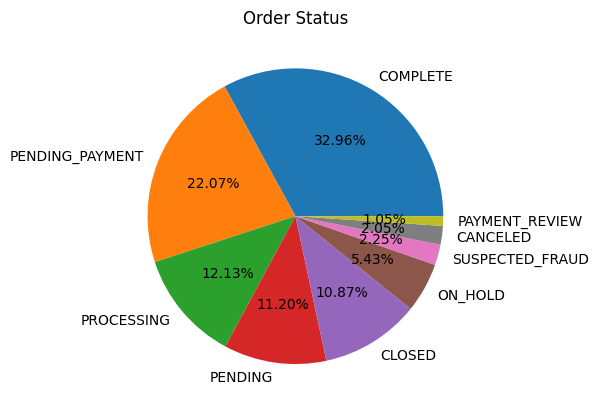

In [ ]:
label=["COMPLETE","PENDING_PAYMENT","PROCESSING","PENDING","CLOSED","ON_HOLD","SUSPECTED_FRAUD","CANCELED","PAYMENT_REVIEW"]
plt.pie(df1,labels=label, autopct='%1.2f%%')
plt.title("Order Status")

the top 10 countries with the highest number of orders in the delivery status

In [ ]:
suc_pro=df[(df["Days for shipping (real)"])>(df["Days for shipment (scheduled)"])]

In [ ]:
import plotly.express as px

# Group by "Order Country" and count "Order Status"
delivery_status = suc_pro.groupby(["Order Country"])["Order Status"].count().reset_index(name="Number of orders")

# Sort by "Number of orders" in descending order and take the top 10 countries
top_10_delivery_status = delivery_status.sort_values(by="Number of orders", ascending=False).head(10)

# Create the bar plot for the top 10 countries
fig = px.bar(top_10_delivery_status,
             x="Order Country",
             y="Number of orders",
             color="Number of orders",
             labels={"Order Country": "Order Country", "Number of orders": "Number of orders"},
             title="Top 10 Countries by Number of Orders")

# Show the plot
fig.show()


the top 10 countries by the number of pending orders

In [ ]:
order_pending=df[df["Order Status"]=="PENDING"]

In [ ]:
# Get the top 10 countries by the number of pending orders
top_10_pending_orders = order_pending["Order Country"].value_counts().head(10)

# Display the result
print(top_10_pending_orders)


Order Country
Estados Unidos    2681
Mxico             1526
Francia           1500
Alemania          1120
Australia          944
Brasil             932
Reino Unido        721
China              688
India              537
Italia             533
Name: count, dtype: int64


top 10 country has most suspected Fraud

In [ ]:
fraud_detected=df[df["Order Status"]=="SUSPECTED_FRAUD"]

<ipython-input-18-0bf143daafc0>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



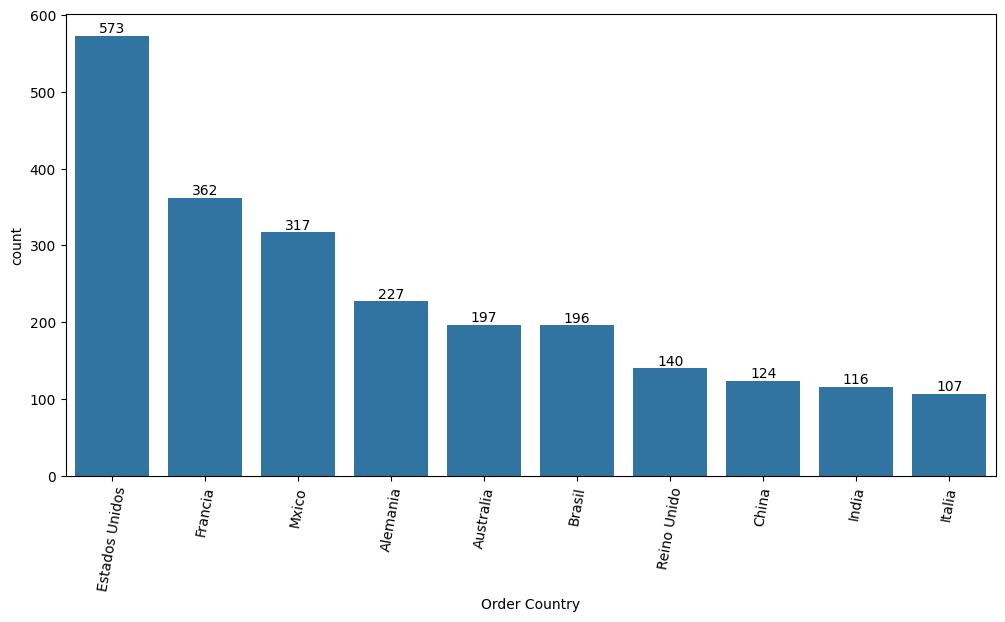

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 most frequent countries
top_10_countries = fraud_detected['Order Country'].value_counts().nlargest(10).index

# Filter dataset to only include the top 10 countries
top_10_data = fraud_detected[fraud_detected['Order Country'].isin(top_10_countries)]

# Plot the countplot
plt.figure(figsize=(12, 6))  # Adjusted figsize for better readability
ax = sns.countplot(data=top_10_data, x="Order Country", order=top_10_countries)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()


Which product has maximum discount

In [ ]:
df2=pd.DataFrame(df, columns=["Product Name","Order Item Discount"])
df2.groupby(["Product Name","Order Item Discount"]).sum().sort_values(by="Order Item Discount",ascending=False).head(1)

,
Product Name,Order Item Discount
SOLE E35 Elliptical,500.0


Top 5 item has maximum profit ratio

In [ ]:
profit_data=df.groupby(["Product Name"])["Order Item Profit Ratio"].count().reset_index(name="Profit").sort_values(by="Profit",ascending=False).head(5)
px.bar(profit_data,x=profit_data["Product Name"],y=profit_data["Profit"],
        labels={"Product Name":"Product Name","Profit":"Profit"})

Top 10 Customer by profit

In [ ]:
df["Customer_ID_STR"]=df['Customer Id'].astype(str)

customer_profit=df.groupby(["Customer_ID_STR"])["Order Profit Per Order"].sum().reset_index(name="Profit").sort_values(by="Profit",ascending=False).head(10)
px.bar(customer_profit,x=customer_profit["Profit"],y=customer_profit["Customer_ID_STR"],
       color=customer_profit["Profit"],
       labels={"Customer_ID_STR":"Customer_ID_STR","Profit":"Profit"},
      title="Which customer is has maximum profit")

Types of payment modes

In [ ]:
df1=df["Type Of Payments"].value_counts()
df1

,count
Type Of Payments,
DEBIT,69295
TRANSFER,49883
PAYMENT,41725
CASH,19616


Top 5 product has maximum price

In [ ]:
df2=pd.DataFrame(df, columns=["Product Name","Product Price"])
df2.groupby(["Product Name","Product Price"]).sum().sort_values(by="Product Price",ascending=False).head(5)


,
Product Name,Product Price
SOLE E35 Elliptical,1999.98999
Dell Laptop,1500.00000
SOLE E25 Elliptical,999.98999
Bowflex SelectTech 1090 Dumbbells,599.98999
Bushnell Pro X7 Jolt Slope Rangefinder,599.98999


Customer segment

Text(0.5, 1.0, 'Customer Segment')

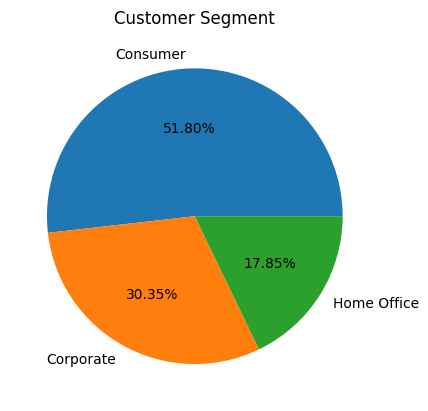

In [ ]:
df1=df["Customer Segment"].value_counts()
label=["Consumer","Corporate","Home Office"]
plt.pie(df1,labels=label, autopct="%.2f%%")
plt.title("Customer Segment")

Top 10 Maximum Category Orders

In [ ]:
import plotly.express as px

# Group by "Category Name" and count "Order Id", sort, and reset the index
category_name = df.groupby(["Category Name"])["Order Id"].count().reset_index(name="Orders")

# Sort by number of orders and take the top 10 categories
top_10_category_name = category_name.sort_values(by="Orders", ascending=False).head(10)

# Create the bar plot
fig = px.bar(top_10_category_name,
             x="Orders",
             y="Category Name",
             color="Orders",
             labels={"Category Name": "Category Name", "Orders": "Orders"},
             title="Top 10 Categories by Maximum Orders",
             orientation='h')  # Horizontal bar plot for better readability

# Show the plot
fig.show()


Sales per year and month

In [ ]:
df['year'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[-1].split(' ')[0])
df['month'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[0].split(' ')[0])

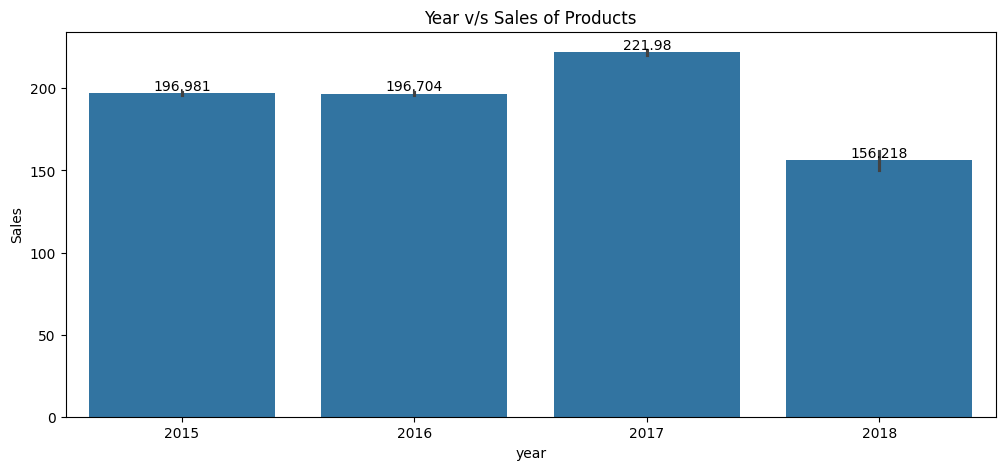

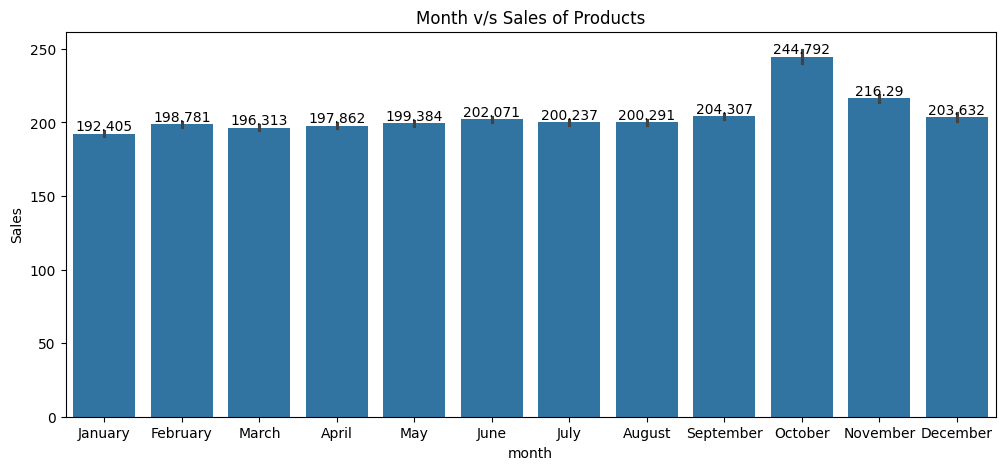

In [ ]:
plt.figure(figsize = (12,5))
plt.title('Year v/s Sales of Products')
ax=sns.barplot(x = 'year',
            y = 'Sales',
              order=["2015","2016","2017","2018"],
            data = df);
for i in ax.containers:
    ax.bar_label(i,)

plt.figure(figsize = (12,5))
df["month"]=df["month"].replace(['1','2','3','4','5','6','7','8','9','10','11','12'],["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"])
plt.title('Month v/s Sales of Products')
ax=sns.barplot(x = 'month',
            y = 'Sales',
            order=["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"],
            data=df);
for i in ax.containers:
    ax.bar_label(i,)


Model Training

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
features = df.drop('Sales', axis=1)
target= df.Sales

In [ ]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [ ]:
features=features.apply(Labelencoder_feature)
features.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR,year,month
0,1,3,3,18934,2568,0,0,47,40,66,...,114,47,78,62,0,27149,3,11912,3,4
1,3,5,3,2272,2559,1,1,47,40,66,...,114,47,78,62,0,2209,3,10509,3,4
2,0,4,3,2293,2555,3,0,47,40,452,...,114,47,78,62,0,1980,3,10508,3,4
3,1,3,3,13638,2546,0,0,47,40,285,...,114,47,78,62,0,1752,3,10507,3,4
4,2,2,3,20599,2526,0,0,47,40,66,...,114,47,78,62,0,1528,3,10505,3,4


In [ ]:
final_features=features[['Benefit per order', 'Sales per customer', 'Category Name',
       'Customer Id', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Id', 'Order Item Total', 'Order Profit Per Order',
       'Order Region', 'Order State',  'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)']]

In [ ]:
final_data=pd.concat([final_features,target],axis=1)

In [ ]:
# Calculate the correlation matrix
corr_matrix = final_data.corr()

# Select the correlations with the "Sales" column
sales_corr = corr_matrix["Sales"]

# Display the correlation with the "Sales" column
print(sales_corr)


Benefit per order             0.266336
Sales per customer            0.852876
Category Name                -0.355216
Customer Id                   0.060966
Customer Segment             -0.004862
Department Name               0.053804
Market                       -0.036507
Order City                   -0.006947
Order Customer Id             0.060966
order date (DateOrders)      -0.026667
Order Id                      0.080083
Order Item Cardprod Id        0.257158
Order Item Discount           0.490422
Order Item Id                 0.079002
Order Item Total              0.852876
Order Profit Per Order        0.266336
Order Region                  0.027889
Order State                  -0.012476
Product Card Id               0.257158
Product Category Id           0.230141
Product Name                 -0.415884
Product Price                 0.626579
shipping date (DateOrders)   -0.028100
Sales                         1.000000
Name: Sales, dtype: float64


<Axes: >

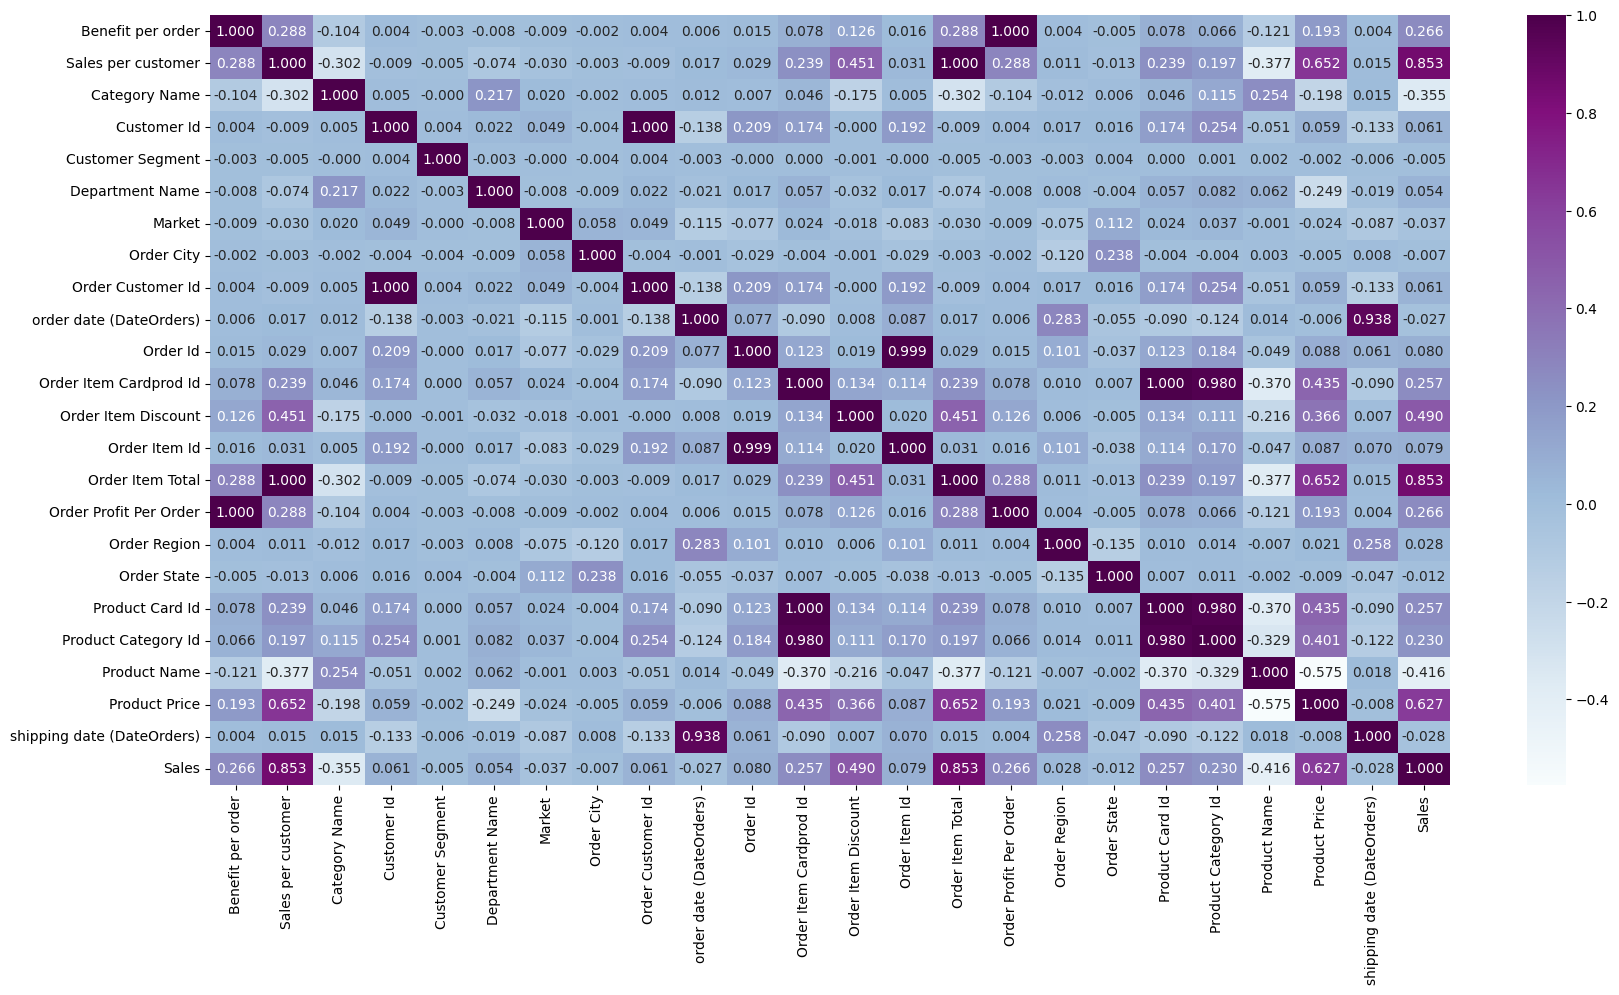

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(),annot=True,fmt=".3f",cmap="BuPu")

In [ ]:
Y1 = final_data.Sales
X1 = final_data.drop('Sales', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.2, random_state=42)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:


reg = LinearRegression()

pipe_reg = Pipeline(steps=[
    ('step1',StandardScaler()),
    ('step2',reg)
])

pipe_reg.fit(X_train , y_train)

# Make predictions on the training data
y_train_pred1 = pipe_reg.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_train_pred1)
mse_train = metrics.mean_squared_error(y_train, y_train_pred1)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred1, squared=False)
r2_train1 = metrics.r2_score(y_train, y_train_pred1)

# Make predictions on the test data
y_test_pred1 = pipe_reg.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred1)
mse_test = metrics.mean_squared_error(y_test, y_test_pred1)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred1, squared=False)
r2_test1 = metrics.r2_score(y_test, y_test_pred1)


# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train1}")
print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test1}")

Training Metrics:
MAE: 26.143544805397987
MSE: 3620.5110330787493
RMSE: 60.170682504677885
R-squared (R²): 0.7935213259894154

Testing Metrics:
MAE: 25.98965881835773
MSE: 3454.8088241055284
RMSE: 58.77762179695201
R-squared (R²): 0.8007716513637266


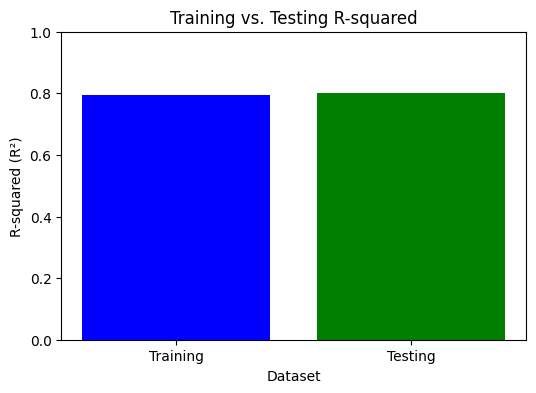

In [ ]:
import matplotlib.pyplot as plt

# R-squared values for training and testing
train_r2 = r2_train1
test_r2 = r2_test1

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Training', 'Testing'], [train_r2, test_r2], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('R-squared (R²)')
plt.title('Training vs. Testing R-squared')
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] for R-squared values
plt.show()

ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import numpy as np
from sklearn import metrics

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.9)

pipe_reg2 = Pipeline(steps=[
    ('step1',StandardScaler()),
    ('step3',elastic_net)
])

pipe_reg2.fit(X_train , y_train)

# Make predictions on the training data
y_train_pred2 = pipe_reg2.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_train_pred2)
mse_train = metrics.mean_squared_error(y_train, y_train_pred2)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred2, squared=False)
r2_train2 = metrics.r2_score(y_train, y_train_pred2)

# Make predictions on the test data
y_test_pred2 = pipe_reg2.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred2)
mse_test = metrics.mean_squared_error(y_test, y_test_pred2)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred2, squared=False)
r2_test2 = metrics.r2_score(y_test, y_test_pred2)


# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train2}")
print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test2}")


Training Metrics:
MAE: 25.87670717651827
MSE: 3721.046879899107
RMSE: 61.000384260257796
R-squared (R²): 0.7877877408263435

Testing Metrics:
MAE: 25.743675384195303
MSE: 3536.0661194947384
RMSE: 59.46483094649087
R-squared (R²): 0.79608578954061


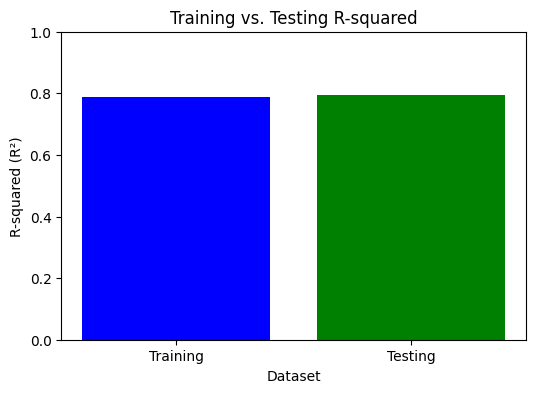

In [ ]:
import matplotlib.pyplot as plt

# R-squared values for training and testing
train_r2 = r2_train2
test_r2 = r2_test2

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Training', 'Testing'], [train_r2, test_r2], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('R-squared (R²)')
plt.title('Training vs. Testing R-squared')
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] for R-squared values
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline

# Initialize the KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Create the pipeline with the KNeighborsRegressor
pipe_reg3 = Pipeline(steps=[
    ('step1', StandardScaler()),
    ('step3', knn_regressor)
])

# Fit the model
pipe_reg3.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred3 = pipe_reg3.predict(X_train)

# Calculate training metrics
mae_train = metrics.mean_absolute_error(y_train, y_train_pred3)
mse_train = metrics.mean_squared_error(y_train, y_train_pred3)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred3, squared=False)
r2_traink = metrics.r2_score(y_train, y_train_pred3)

# Make predictions on the test data
y_test_pred3 = pipe_reg3.predict(X_test)

# Calculate testing metrics
mae_test = metrics.mean_absolute_error(y_test, y_test_pred3)
mse_test = metrics.mean_squared_error(y_test, y_test_pred3)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred3, squared=False)
r2_testk = metrics.r2_score(y_test, y_test_pred3)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_traink}")
print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_testk}")


Training Metrics:
MAE: 9.945325700398143
MSE: 403.0831220895023
RMSE: 20.07693009624485
R-squared (R²): 0.9770120660302717

Testing Metrics:
MAE: 12.590016246770302
MSE: 704.5969410142972
RMSE: 26.54424496975375
R-squared (R²): 0.9593680310085487


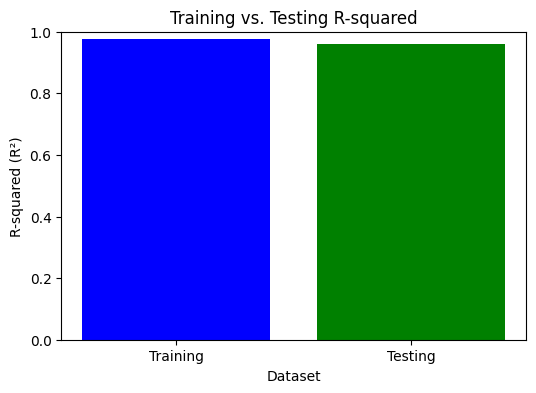

In [ ]:
import matplotlib.pyplot as plt

# R-squared values for training and testing
train_r2 = r2_traink
test_r2 = r2_testk

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Training', 'Testing'], [train_r2, test_r2], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('R-squared (R²)')
plt.title('Training vs. Testing R-squared')
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] for R-squared values
plt.show()

SVM

In [ ]:
# from sklearn.svm import SVR
# from sklearn import metrics
# from sklearn.pipeline import Pipeline

# # Initialize the Support Vector Regressor (SVR)
# svr_regressor = SVR(kernel='linear')  # You can change the kernel type

# # Create the pipeline with the SVR regressor
# pipe_reg = Pipeline(steps=[
#     ('step1', StandardScaler()),
#     ('step2', svr_regressor)
# ])

# # Fit the model on the training data
# pipe_reg.fit(X_train, y_train)

# # Make predictions on the training data
# y_train_pred = pipe_reg.predict(X_train)

# # Calculate training metrics
# mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
# mse_train = metrics.mean_squared_error(y_train, y_train_pred)
# rmse_train = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
# r2_train = metrics.r2_score(y_train, y_train_pred)

# # Make predictions on the test data
# y_test_pred = pipe_reg.predict(X_test)

# # Calculate testing metrics
# mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
# mse_test = metrics.mean_squared_error(y_test, y_test_pred)
# rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
# r2_test = metrics.r2_score(y_test, y_test_pred)

# # Print the metrics
# print("Training Metrics:")
# print(f"MAE: {mae_train}")
# print(f"MSE: {mse_train}")
# print(f"RMSE: {rmse_train}")
# print(f"R-squared (R²): {r2_train}")
# print("\nTesting Metrics:")
# print(f"MAE: {mae_test}")
# print(f"MSE: {mse_test}")
# print(f"RMSE: {rmse_test}")
# print(f"R-squared (R²): {r2_test}")


In [ ]:
# import matplotlib.pyplot as plt

# # R-squared values for training and testing
# train_r2 = r2_train
# test_r2 = r2_test

# # Create a bar chart
# plt.figure(figsize=(6, 4))
# plt.bar(['Training', 'Testing'], [train_r2, test_r2], color=['blue', 'green'])
# plt.xlabel('Dataset')
# plt.ylabel('R-squared (R²)')
# plt.title('Training vs. Testing R-squared')
# plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] for R-squared values
# plt.show()

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
from sklearn import metrics

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

pipe_reg3 = Pipeline(steps=[
    ('step1',StandardScaler()),
    ('step3',rf_regressor)
])

pipe_reg3.fit(X_train , y_train)

# Make predictions on the training data
y_train_pred3 = pipe_reg3.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_train_pred3)
mse_train = metrics.mean_squared_error(y_train, y_train_pred3)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred3, squared=False)
r2_train3 = metrics.r2_score(y_train, y_train_pred3)

# Make predictions on the test data
y_test_pred3 = pipe_reg3.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred3)
mse_test = metrics.mean_squared_error(y_test, y_test_pred3)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred3, squared=False)
r2_test3 = metrics.r2_score(y_test, y_test_pred3)


# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train3}")
print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test3}")



Training Metrics:
MAE: 0.011065258799614265
MSE: 0.47850251423907175
RMSE: 0.6917387615560312
R-squared (R²): 0.9999727108787273

Testing Metrics:
MAE: 0.038207906278660796
MSE: 4.584162663199926
RMSE: 2.1410657774108497
R-squared (R²): 0.999735645240079


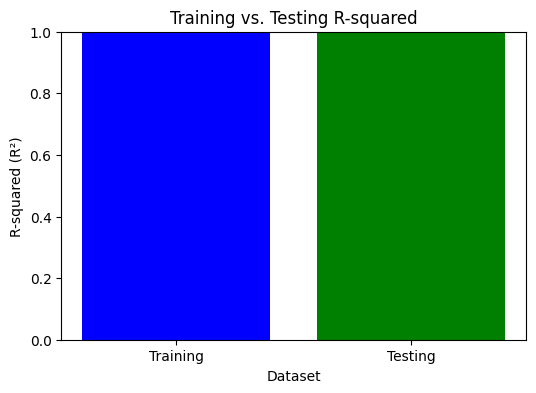

In [ ]:
import matplotlib.pyplot as plt

# R-squared values for training and testing
train_r2 = r2_train3
test_r2 = r2_test3

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Training', 'Testing'], [train_r2, test_r2], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('R-squared (R²)')
plt.title('Training vs. Testing R-squared')
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] for R-squared values
plt.show()

Ensemble:

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Define individual models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gbr_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Create the voting regressor with multiple models
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf_regressor),
    ('gbr', gbr_regressor),
    ('xgb', xgb_regressor)
])

# Create a pipeline with the Voting Regressor
pipe_reg_ensemble = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('voting', voting_regressor)
])

# Train the pipeline on the training data
pipe_reg_ensemble.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_ensemble = pipe_reg_ensemble.predict(X_train)

# Calculate metrics for training data
mae_train = metrics.mean_absolute_error(y_train, y_train_pred_ensemble)
mse_train = metrics.mean_squared_error(y_train, y_train_pred_ensemble)
rmse_train = np.sqrt(mse_train)
r2_trainv = metrics.r2_score(y_train, y_train_pred_ensemble)

# Make predictions on the test data
y_test_pred_ensemble = pipe_reg_ensemble.predict(X_test)

# Calculate metrics for test data
mae_test = metrics.mean_absolute_error(y_test, y_test_pred_ensemble)
mse_test = metrics.mean_squared_error(y_test, y_test_pred_ensemble)
rmse_test = np.sqrt(mse_test)
r2_testv = metrics.r2_score(y_test, y_test_pred_ensemble)

# Print the metrics
print("Training Metrics (Voting Regressor):")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_trainv}")
print("\nTesting Metrics (Voting Regressor):")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_testv}")


Training Metrics (Voting Regressor):
MAE: 0.6114493086319621
MSE: 1.159118171365925
RMSE: 1.0766235049291488
R-squared (R²): 0.9999338951930105

Testing Metrics (Voting Regressor):
MAE: 0.6224367863088294
MSE: 2.370065128551603
RMSE: 1.5395015844589452
R-squared (R²): 0.9998633255309448


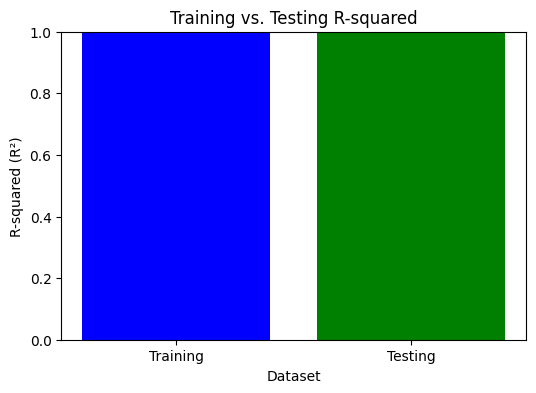

In [ ]:
import matplotlib.pyplot as plt

# R-squared values for training and testing
train_r2 = r2_trainv
test_r2 = r2_testv

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Training', 'Testing'], [train_r2, test_r2], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('R-squared (R²)')
plt.title('Training vs. Testing R-squared')
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] for R-squared values
plt.show()